# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [96]:
import pandas as pd
import numpy as np

In [195]:
# Read in the customer data
customers = pd.read_csv('../data/maven_music_customers.csv')

customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [5]:
# Read in the listening history
listening = pd.read_excel('../data/maven_music_listening_history.xlsx')

listening.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [7]:
# Hint: Where might you find listening history data beyond the ID's?
# Answer: Check the other sheets in the Excel spreadsheet

In [294]:
# Read in the audio data
audio = pd.read_excel('../data/maven_music_listening_history.xlsx', sheet_name=1)

audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [11]:
# Read in the session data
sessions = pd.read_excel('../data/maven_music_listening_history.xlsx', sheet_name=2)

sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [142]:
# Check the data types
customers.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [197]:
# Convert objects to numeric and datetime fields

customers['Member Since'] = pd.to_datetime(customers['Member Since'])
customers['Subscription Rate'] = pd.to_numeric(customers['Subscription Rate'].str.replace('$', ''))
customers['Cancellation Date'] = pd.to_datetime(customers['Cancellation Date'])

/var/folders/v4/7fzzxp4j30n_kxbg66tb0rj80000gn/T/ipykernel_29247/797488426.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Member Since'] = pd.to_datetime(customers['Member Since'])
/var/folders/v4/7fzzxp4j30n_kxbg66tb0rj80000gn/T/ipykernel_29247/797488426.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Cancellation Date'] = pd.to_datetime(customers['Cancellation Date'])


In [308]:
# Check the data types
listening.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [296]:
# Check the data types
audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [57]:
# Check the data types
sessions.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [298]:
# Look for NaN values in the data
audio.isna().sum()

ID            0
Name          0
Genre         0
Popularity    0
dtype: int64

In [148]:
# Look for NaN values in the data
sessions.isna().sum()

Session ID             0
Session Log In Time    0
dtype: int64

In [77]:
# Look for NaN values in the data
listening.isna().sum()

Customer ID    0
Session ID     0
Audio Order    0
Audio ID       0
Audio Type     0
dtype: int64

In [150]:
# Look for NaN values in the data
customers.isna().sum()

Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Plan     5
Subscription Rate     0
Discount?            23
Cancellation Date    17
dtype: int64

In [152]:
customers[customers.isna().any(axis=1)]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT


In [232]:
customers['Subscription Plan'] = customers['Subscription Plan'].fillna('Basic (Ads)')
customers['Discount?'] = np.where(customers['Discount?']=='Yes', 1, 0)

#### ii. Inconsistent Text & Typos

In [300]:
# Look for inconsistent text & typos

audio['Genre'].value_counts()

Genre
Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [302]:
audio['Genre'] = np.where(audio['Genre'] == 'Pop Music', 'Pop', audio['Genre'])

#### iii. Duplicate Rows

In [207]:
# Look for duplicate rows
customers[customers.duplicated(keep=False)]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [209]:
# Look for duplicate rows
sessions[sessions.duplicated(keep=False)]

,Session ID,Session Log In Time


In [211]:
# Look for duplicate rows
listening[listening.duplicated(keep=False)]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [213]:
# Look for duplicate rows
audio[audio.duplicated(keep=False)]

,ID,Name,Genre,Popularity


#### iv. Outliers

<Axes: xlabel='Subscription Rate', ylabel='Count'>

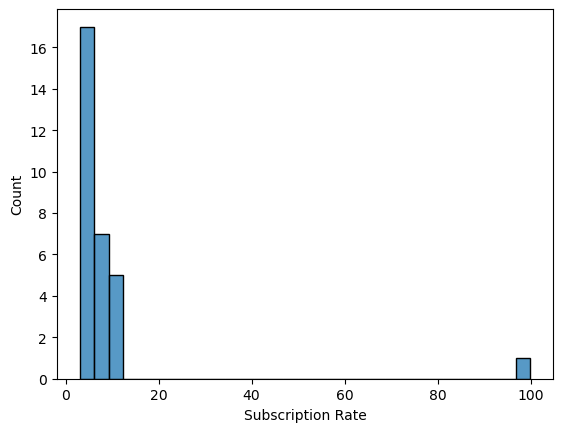

In [216]:
# Look for outliers
import seaborn as sns
sns.histplot(customers['Subscription Rate'])

In [218]:
customers[customers['Subscription Rate'] > 90]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,No,2023-06-02


In [220]:
customers['Subscription Rate'] = np.where(customers['Subscription Rate'] > 90, 9.99, customers['Subscription Rate'])

<Axes: ylabel='Count'>

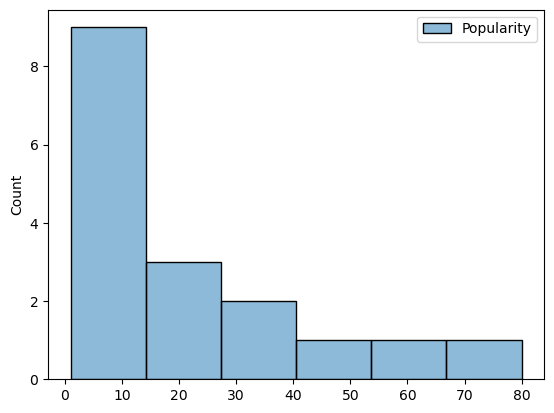

In [222]:
sns.histplot(audio)

### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [234]:
# Create a 'Cancelled' column
customers['Cancelled'] = np.where(customers['Cancellation Date'].isna(), 0, 1)

In [236]:
# Create an updated 'Email' column without the Email: portion
customers.Email = customers.Email.str.replace('Email: ', '')

In [238]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [328]:
# How long were customers members before they cancelled?
cancelled = customers[customers['Cancelled'] == 1]
(cancelled['Cancellation Date'] - cancelled['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [334]:
# Cancellation rate for those who had a discount
discount_yes = customers[customers['Discount?'] == 1]

discount_yes.Cancelled.sum() / discount_yes.Cancelled.count()

0.8571428571428571

In [336]:
# Cancellation rate for those who did not have a discount
discount_no = customers[customers['Discount?'] == 0]

discount_no.Cancelled.sum() / discount_no.Cancelled.count()

0.30434782608695654

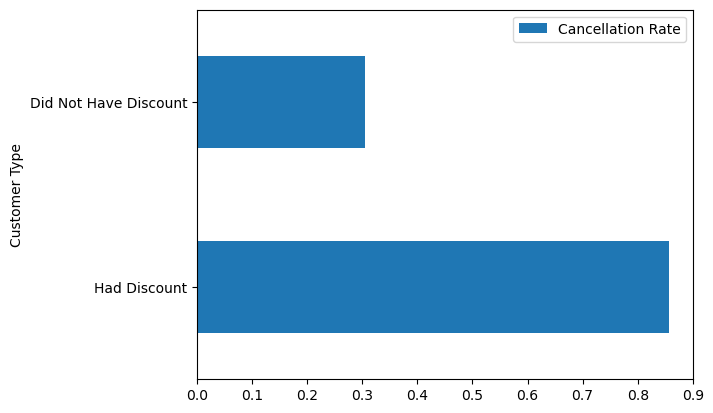

In [340]:
# Visualize the cancellation rate for those with a discount vs those without a discount
pd.DataFrame([['Had Discount', 0.8571428571428571],
             ['Did Not Have Discount', 0.30434782608695654]],
             columns=['Customer Type', 'Cancellation Rate']).plot.barh(x='Customer Type', y='Cancellation Rate');

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [304]:
# Split the ID in the audio data so the column can be joined with other tables
audio[['Type', 'ID']] = audio.ID.str.split('-').to_list()
audio.head()

,ID,Name,Genre,Popularity,Type
0,101,Dance All Night,Pop,1,Song
1,102,Unbreakable Beat,Pop,2,Song
2,103,Sunset Boulevard,Pop,5,Song
3,104,Glowing Hearts,Pop,10,Song
4,105,Pop Rocks,Pop,52,Song


In [314]:
# Hint: Check the data type of Audio ID in the audio table
audio.dtypes

audio.ID = pd.to_numeric(audio.ID)

In [320]:
listening_audio = listening.merge(audio, how='left', left_on='Audio ID', right_on='ID')
listening_audio.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity,Type
0,5001,100520,1,101,Song,101,Dance All Night,Pop,1,Song
1,5001,100520,2,102,Song,102,Unbreakable Beat,Pop,2,Song
2,5001,100520,3,103,Song,103,Sunset Boulevard,Pop,5,Song
3,5001,100520,4,104,Song,104,Glowing Hearts,Pop,10,Song
4,5001,100520,5,105,Song,105,Pop Rocks,Pop,52,Song


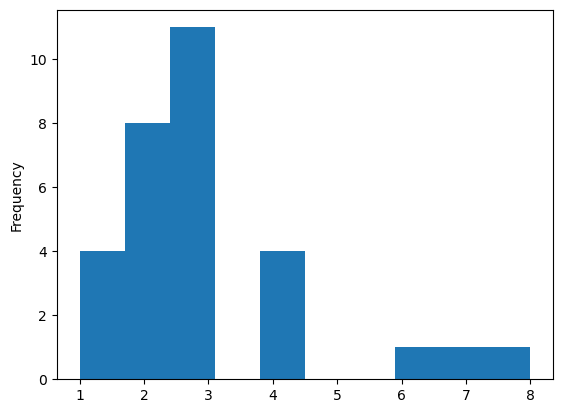

In [344]:
# The number of listening sessions that each customer had in the past 3 months
listening_audio.groupby('Customer ID')['Session ID'].nunique().plot.hist();


In [342]:
# The most popular genres that customers listened to
popular_genres =listening_audio.groupby('Genre')['Session ID'].count()
popular_genres

Genre
Comedy         19
Country        68
Hip Hop        88
Jazz           48
Pop           267
True Crime     15
Name: Session ID, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [390]:
# Create a dataframe ready for modeling
model_df = customers[['Customer ID', 'Cancelled', 'Discount?']]
model_df.head()

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [392]:
# Calculate the number of listening sessions for each customer
customer_sessions = (listening_audio.groupby('Customer ID')['Session ID']
                     .nunique()
                     .to_frame()
                     .reset_index()
                     .rename(columns={'Session ID':'Session Count'}))
customer_sessions.head()

,Customer ID,Session Count
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [394]:
model_df = model_df.merge(customer_sessions, how='left', on='Customer ID')
model_df.head()

,Customer ID,Cancelled,Discount?,Session Count
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [404]:
# Calculate Dummy variables for each genre
pd.get_dummies(listening_audio.Genre, dtype=int)

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
500,0,0,0,1,0,0
501,1,0,0,0,0,0
502,0,0,1,0,0,0
503,0,0,1,0,0,0


In [412]:
# Combine with customer id
pd.concat([listening_audio['Customer ID'], pd.get_dummies(listening_audio.Genre, dtype=int)], axis=1)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,0,0,1,0
1,5001,0,0,0,0,1,0
2,5001,0,0,0,0,1,0
3,5001,0,0,0,0,1,0
4,5001,0,0,0,0,1,0
...,...,...,...,...,...,...,...
500,7579,0,0,0,1,0,0
501,6588,1,0,0,0,0,0
502,5763,0,0,1,0,0,0
503,5763,0,0,1,0,0,0


In [414]:
genres = pd.concat([listening_audio['Customer ID'], pd.get_dummies(listening_audio.Genre, dtype=int)], axis=1).groupby('Customer ID').sum().reset_index()
genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [416]:
total_audio = listening_audio.groupby('Customer ID')['Audio ID'].count().rename('Total Audio').to_frame().reset_index()
total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [420]:
df_audio = genres.merge(total_audio, how='left', on='Customer ID')
df_audio.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18


In [422]:
# Percent pop
model_df['Percent Pop'] = df_audio.Pop / df_audio['Total Audio'] * 100
model_df.head()


,Customer ID,Cancelled,Discount?,Session Count,Percent Pop
0,5001,0,0,8,56.666667
1,5002,0,0,4,0.000000
2,5004,1,0,1,100.000000
3,5267,0,0,7,51.111111
4,5338,0,0,4,0.000000


In [428]:
# Percent podcasts
model_df['Percent Podcasts'] = ((df_audio['Comedy'] + df_audio['True Crime']) / df_audio['Total Audio']) * 100
model_df.head()


,Customer ID,Cancelled,Discount?,Session Count,Percent Pop,Percent Podcasts
0,5001,0,0,8,56.666667,0.0
1,5002,0,0,4,0.000000,0.0
2,5004,1,0,1,100.000000,0.0
3,5267,0,0,7,51.111111,0.0
4,5338,0,0,4,0.000000,0.0


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

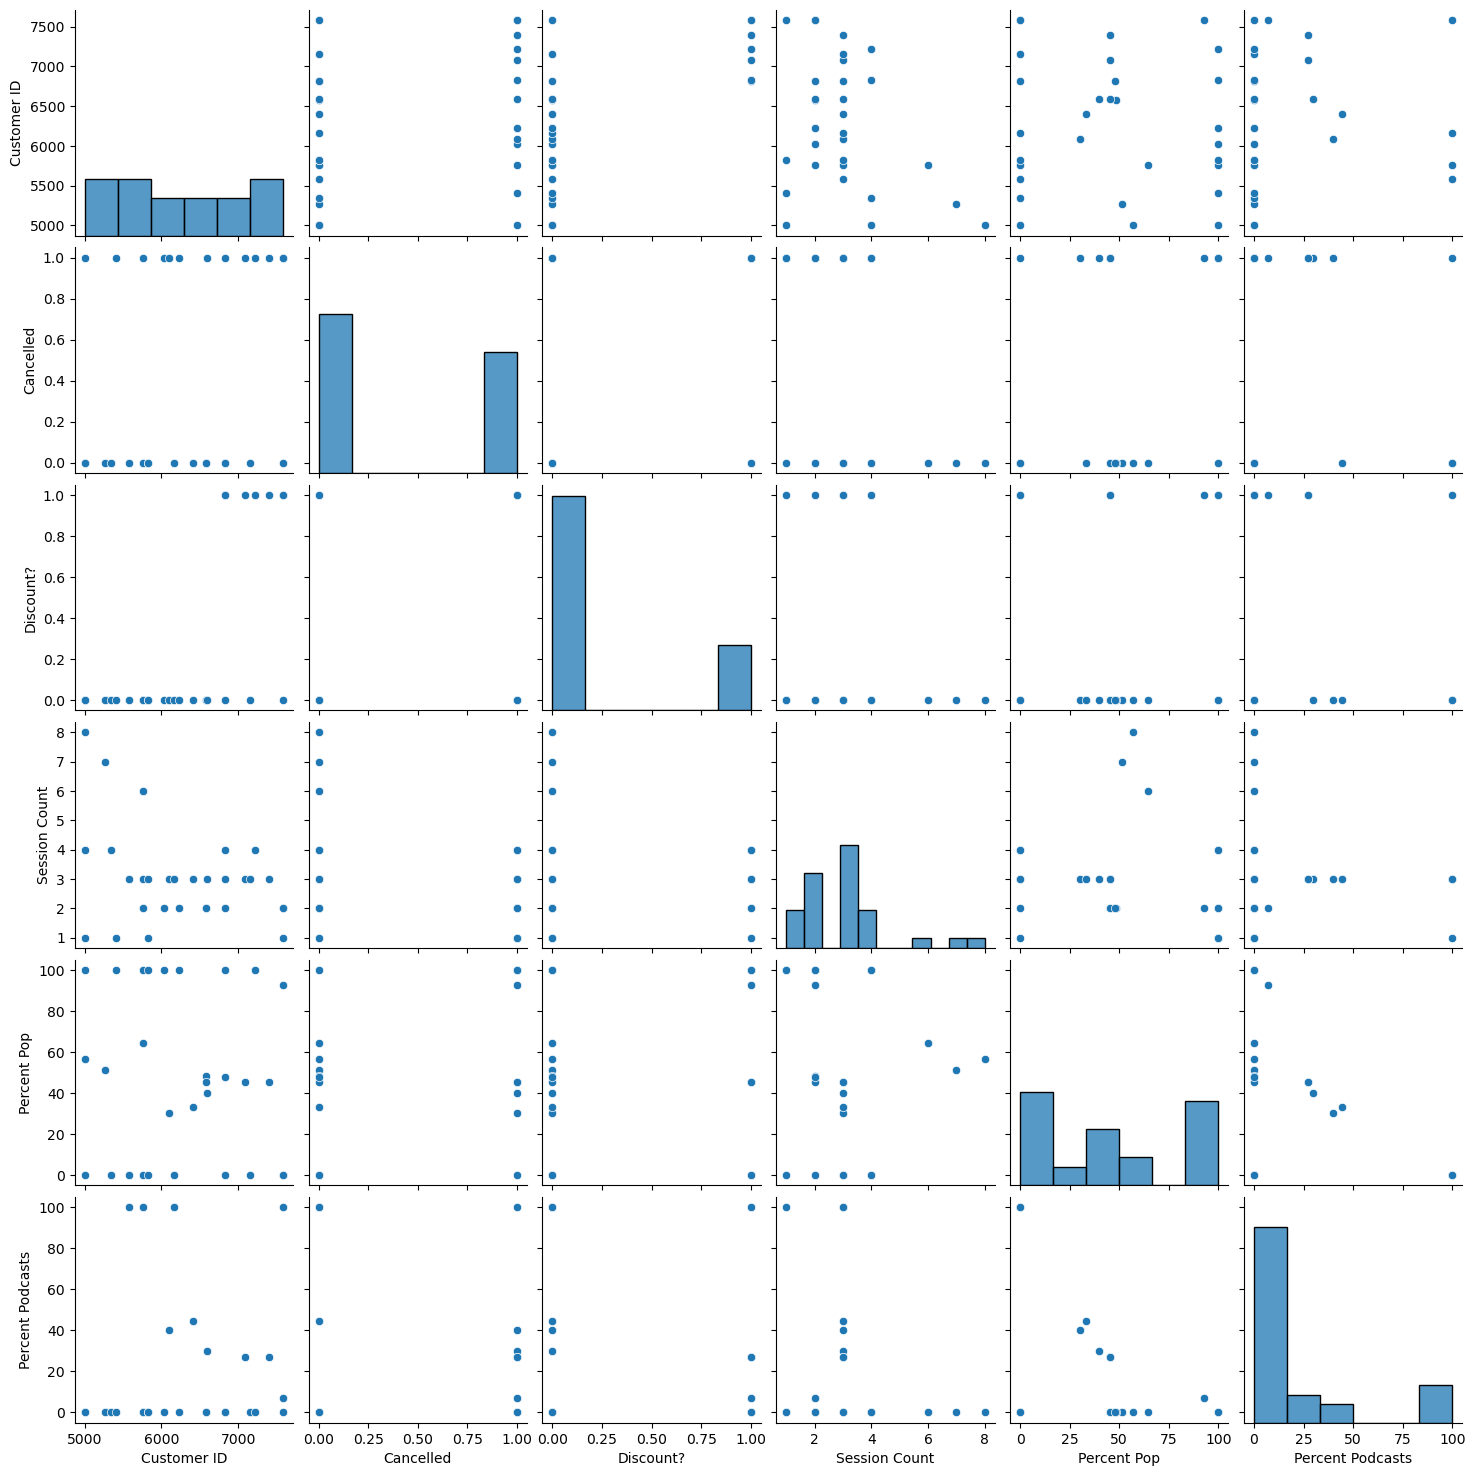

In [430]:
sns.pairplot(model_df);

In [432]:
model_df.corr()

,Customer ID,Cancelled,Discount?,Session Count,Percent Pop,Percent Podcasts
Customer ID,1.000000,0.269942,0.648514,-0.337083,-0.076129,0.083083
Cancelled,0.269942,1.000000,0.471825,-0.333739,0.585630,-0.035414
Discount?,0.648514,0.471825,1.000000,-0.048877,0.112675,0.062938
Session Count,-0.337083,-0.333739,-0.048877,1.000000,-0.131156,-0.125459
Percent Pop,-0.076129,0.585630,0.112675,-0.131156,1.000000,-0.487193
Percent Podcasts,0.083083,-0.035414,0.062938,-0.125459,-0.487193,1.000000


In [ ]:
# Observations
## A discount is correlated with a cancellation
## The more listening sessions, the few cancellations
## The more pop music, the more cancellations
## Podcast listening seems unrelated to cancellations